## 时序差分预测
### Example 6.1 with Exercise 6.2 and Figure 6.1

### 开车回家的问题

In [19]:
state = ["离开办公室", "上车", "离开街道", "第二段路", "居住的街道", "到家"]
reward = [0,5,20,30,40,43]
real_time = [30,40,35,40,43,43]

In [28]:
def mc_prediction():
    predicted_total_time = []
    predicted_time_to_go = []

    for i,s in enumerate(state):
        G = 43 - reward[i] 
        predicted_time_to_go.append(G)
        predicted_total_time.append(43)
    print("mc predicted time to go:", predicted_time_to_go)
    print("mc predicted total time:", predicted_total_time)
    return predicted_total_time

In [29]:
mc_result = mc_prediction()

mc predicted time to go: [43, 38, 23, 13, 3, 0]
mc predicted total time: [43, 43, 43, 43, 43, 43]


In [38]:
def td_prediction():
    predicted_total_time = []
    predicted_time_to_go = []

    for i,s in enumerate(state):
        if i == len(state)-1: #最后一个点
            predicted_total_time.append(43)
            predicted_time_to_go.append(0)
            break
        if real_time[i+1] < 43: #到达终点
            predicted_total_time.append(real_time[i+1])
            predicted_time_to_go.append(real_time[i+1] - r[i])
        else:
            predicted_total_time.append(43)
            predicted_time_to_go.append(43 - r[i])
    print("td predicted time to go:", predicted_time_to_go)
    print("td predicted total time:", predicted_total_time)
    return predicted_total_time

In [39]:
td_result = td_prediction()

td predicted time to go: [40, 30, 20, 13, 3, 0]
td predicted total time: [40, 35, 40, 43, 43, 43]


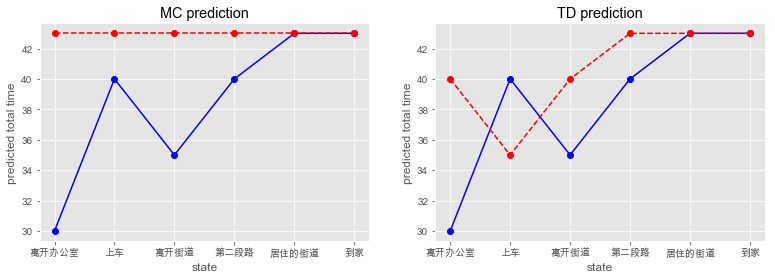

In [63]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #用来正常显示中文标签
%matplotlib inline

plt.figure(12,figsize=(13,4))
plt.subplot(121)
plt.xlabel('state')
plt.ylabel('predicted total time')
plt.title("MC prediction")

plt.plot(state, real_time, c='blue', marker='o')
plt.plot(state, mc_result, c='red', marker='o', linestyle='--' )
#plt.subplot

plt.subplot(122)
plt.xlabel('state')
plt.ylabel('predicted total time')
plt.title("TD prediction")

plt.plot(state, real_time, c='blue', marker='o')
plt.plot(state, td_result, c='red', marker='o', linestyle='--' )
plt.show()
#plt.subplot
